# <u>**Kaggle Competitions: House Price - Pipeline & Modeling (Random Forest)**</u>

## <span style = 'color: red'>**Importing Stage**</span>

In [1]:
# import basic data cleaning libraries
import pandas as pd
import numpy as np
# hide warnings if max iteration time does not converge
import warnings
# data visualization (along with EDA stage)
import matplotlib.pyplot as plt
import seaborn as sns
# input missing data
from sklearn.impute import SimpleImputer
# data preprocessing (along with EDA stage)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
# data splitting
from sklearn.model_selection import train_test_split
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# modeling
from sklearn.ensemble import RandomForestRegressor
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# saving dataframes or models
import joblib

In [2]:
# ignore warning messages
warnings.filterwarnings('ignore')
# show all columns
pd.set_option('display.max_columns', None)

## <span style = 'color: red'>**Import DataFrame After Data Cleaning**</span>

In [3]:
df_clean = joblib.load('../data/df_clean.pkl')
df_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Style_Type,Year_Avg,Roof_Style_Mat,ExteriorSame,is_MasVnr,BsmtFinCombined,TotalFlrSF,is_LowQualFinSF,Has_Wooden_Deck,Has_Open_Porch,Has_Enclose_Porch,Has_3Sn_Porch,Has_Screen_Porch,Total_Porch_Area,Has_Pool,YrSold_str,MoSold_str,Year_Month_Sold,Season_Sold,SalePrice_log
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,NoFeature,0,2,2008,WD,Normal,208500,1Fam_2Story,2003.0,Gable_CompShg,1,1,GLQ+Unf,1710,0,0,1,0,0,0,61,0,2008,2,2008-2,winter,12.247699
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,NoFeature,0,5,2007,WD,Normal,181500,1Fam_1Story,1976.0,Gable_CompShg,1,0,ALQ+Unf,1262,0,1,0,0,0,0,0,0,2007,5,2007-5,spring,12.109016
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,NoFeature,0,9,2008,WD,Normal,223500,1Fam_2Story,2001.5,Gable_CompShg,1,1,GLQ+Unf,1786,0,0,1,0,0,0,42,0,2008,9,2008-9,fall,12.317171
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,NoFeature,0,2,2006,WD,Abnorml,140000,1Fam_2Story,1942.5,Gable_CompShg,0,0,ALQ+Unf,1717,0,0,1,1,0,0,307,0,2006,2,2006-2,winter,11.849405
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,NoFeature,0,12,2008,WD,Normal,250000,1Fam_2Story,2000.0,Gable_CompShg,1,1,GLQ+Unf,2198,0,1,1,0,0,0,84,0,2008,12,2008-12,winter,12.429220


In [4]:
df_clean.shape

(1460, 101)

In [5]:
y = df_clean['SalePrice']
x = df_clean.drop(columns = ['SalePrice'])

In [6]:
y_log = np.log1p(y)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(df_clean, y_log, test_size = 0.2, random_state = 42)

## <span style = 'color: red'>**Pipeline - Preprocessing & Modeling**</span>

#### <span style = 'color: yellow'>**Preprocessor for <u>Random Forest</u>**

#### <u>OneHotEncoder</u>: 	MSSubClass, MSZoning, Street, LotShape, LandContour, LotConfig, Neighborhood, Condition1,
#### <u>OneHotEncoder</u>:  Style_Type, Roof_Style_Mat, Exterior1st, Exterior2nd, is_MasVnr, ExterQual, ExterCond,
#### <u>OneHotEncoder</u>:  Foundation, BsmtQual, BsmtExposure, BsmtFinType1, Heating (temp), HeatingQC, CentralAir,
#### <u>OneHotEncoder</u>:  Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual,
#### <u>OneHotEncoder</u>:  GarageCond, PavedDrive, Has_Pool, PoolQC, Fence, MiscFeature, Season_Sold, SaleType, SaleCondition
#### --------
#### <u>PowerTransformer</u>:  LotRatio, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea,
#### <u>PowerTransformer</u>:  WoodDeckSF, OpenPorchSF, Total_Porch_Area
#### --------
#### <u>Standardize</u>:  Year_Avg, GarageYrBlt
#### --------
#### <u>Passthrough</u>:  BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars

In [8]:
# OneHotEncoder
onehot_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                   'Style_Type', 'Roof_Style_Mat', 'Exterior1st', 'Exterior2nd', 'is_MasVnr', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 
                   'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                   'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'Year_Month_Sold', 'Season_Sold', 'SaleType', 'SaleCondition']

# SimpleImputer with most frequent + OneHotEncoder
impute_onehot_features = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Electrical']

# PowerTransformer + Standardize
power_features = ['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalFlrSF', 'GrLivArea', 'GarageArea', 
                  'WoodDeckSF', 'OpenPorchSF', 'Total_Porch_Area']

# Standardize
scale_features = ['Year_Avg', 'GarageYrBlt']

# SimpleImputer + PowerTransformer + Standardize
impute_power_features = ['LotFrontage', 'MasVnrArea']

# binary or ordinal features just keep them as they are
pass_features = ['OverallQual', 'OverallCond', 'ExteriorSame', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'is_LowQualFinSF', 'Has_Open_Porch', 'Has_Wooden_Deck', 'Has_Enclose_Porch', 'Has_3Sn_Porch',
                 'Has_Screen_Porch', 'Has_Pool']

class LotRatioTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return (X[:, [0]] / X[:, [1]])
        
    def get_feature_names_out(self, input_features=None):
        return ["LotRatio"]

class BsmtFinCombinedTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return (X[:, [0]] + X[:, [1]])
        
    def get_feature_names_out(self, input_features=None):
        return ["BsmtFinCombined"]

preprocessor = ColumnTransformer (
    transformers = [
        ('onehot_encoder', OneHotEncoder(handle_unknown = 'ignore'), onehot_features),

        ('impute_onehot', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]), impute_onehot_features),

        ('power_scaler', PowerTransformer(method = 'yeo-johnson', standardize = True), power_features),

        ('scaler', StandardScaler(), scale_features),

        ('impute_power', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('power_scaler', PowerTransformer(method = 'yeo-johnson', standardize = True))
        ]), impute_power_features),

        ('pass', 'passthrough', pass_features),

        ('lot_ratio', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('feature_eng', LotRatioTransformer()),
            ('power_scaler', PowerTransformer(method = 'yeo-johnson', standardize = True))
        ]), ['LotFrontage', 'LotArea']),

        ('bsmt_combine', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'most_frequent')),
            ('feature_eng', BsmtFinCombinedTransformer()),
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]), ['BsmtFinType1', 'BsmtFinType2'])
    ],
    remainder = 'drop'
)

#### <span style = 'color: yellow'>**Model for <u>Random Forest</u>**

In [9]:
random_forest_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(random_state = 42))
])

## <span style = 'color: red'>**GridSearchCV**</span>

In [10]:
random_forest_param_grid = {
    'random_forest__n_estimators': [50, 100, 200, 300],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10, 20]
}

random_forest_grid_search = GridSearchCV(
    estimator = random_forest_model,
    param_grid = random_forest_param_grid,
    cv = 5, 
    scoring = {
        'RMSE': 'neg_root_mean_squared_error',
        'MAE': 'neg_mean_absolute_error',
        'R2': 'r2'
    },
    refit = 'RMSE',
    n_jobs = -1,
    verbose = 1
)

# fit the grid search to your training data
random_forest_grid_search.fit(x_train, y_train)

# see the best parameters and best score
print('**Random Forest Model**')
print('Best Parameters: ', random_forest_grid_search.best_params_)
print('Best Cross-Validation Score: {:.4f}'.format(random_forest_grid_search.best_score_))

# get the best model to use for prediction
best_random_forest_model = random_forest_grid_search.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
**Random Forest Model**
Best Parameters:  {'random_forest__max_depth': 20, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}
Best Cross-Validation Score: -0.1435


In [14]:
y_pred_log = best_random_forest_model.predict(x_val)
y_pred = np.expm1(y_pred_log)

y_val_actual = np.expm1(y_val)

mse = mean_squared_error(y_val_actual, y_pred)
log_mse = mean_squared_error(y_val, y_pred_log)

rmse = np.sqrt(mse)
log_rmse = np.sqrt(log_mse)

mae = mean_absolute_error(y_val_actual, y_pred)

r2 = r2_score(y_val_actual, y_pred)

print('--Random Forest Model--')
print('RMSE: {:.4f}'.format(rmse))
print('Log-RMSE: {:.4f}'.format(log_rmse))
print('MAE: {:.4f}'.format(mae))
print('r2 score: {:.4f}'.format(r2))

--Random Forest Model--
RMSE: 30148.6193
Log-RMSE: 0.1483
MAE: 17456.7217
r2 score: 0.8815


## <span style = 'color: red'>**Feature Importance & Refine - Random Forest Model**</span>

In [12]:
# get the name of the model
trained_random_forest_model = best_random_forest_model.named_steps['random_forest']
# get the feature importance
random_forest_importance = trained_random_forest_model.feature_importances_
# get the name of features from preprocessor
random_forest_feature_names = best_random_forest_model.named_steps['preprocessor'].get_feature_names_out()
# create DataFrame using absolute values of coefficients
coef_df = pd.DataFrame({
    'Feature': random_forest_feature_names,
    'Importance': random_forest_importance,
}).sort_values('Importance', ascending = False)
coef_df.tail(50)

,Feature,Importance
158,onehot_encoder__ExterCond_Po,1.994660e-06
20,onehot_encoder__Street_Grvl,1.831468e-06
3,onehot_encoder__MSSubClass_45,1.755321e-06
86,onehot_encoder__Style_Type_2fmCon_2.5Fin,1.619554e-06
79,onehot_encoder__Style_Type_1Fam_2.5Unf,1.597516e-06
397,bsmt_combine__BsmtFinCombined_BLQGLQ,1.543005e-06
13,onehot_encoder__MSSubClass_180,1.394929e-06
406,bsmt_combine__BsmtFinCombined_LwQALQ,1.328912e-06
9,onehot_encoder__MSSubClass_85,1.241141e-06
94,onehot_encoder__Style_Type_Duplex_SLvl,1.228657e-06


Text(0.5, 1.0, 'Feature Importance')

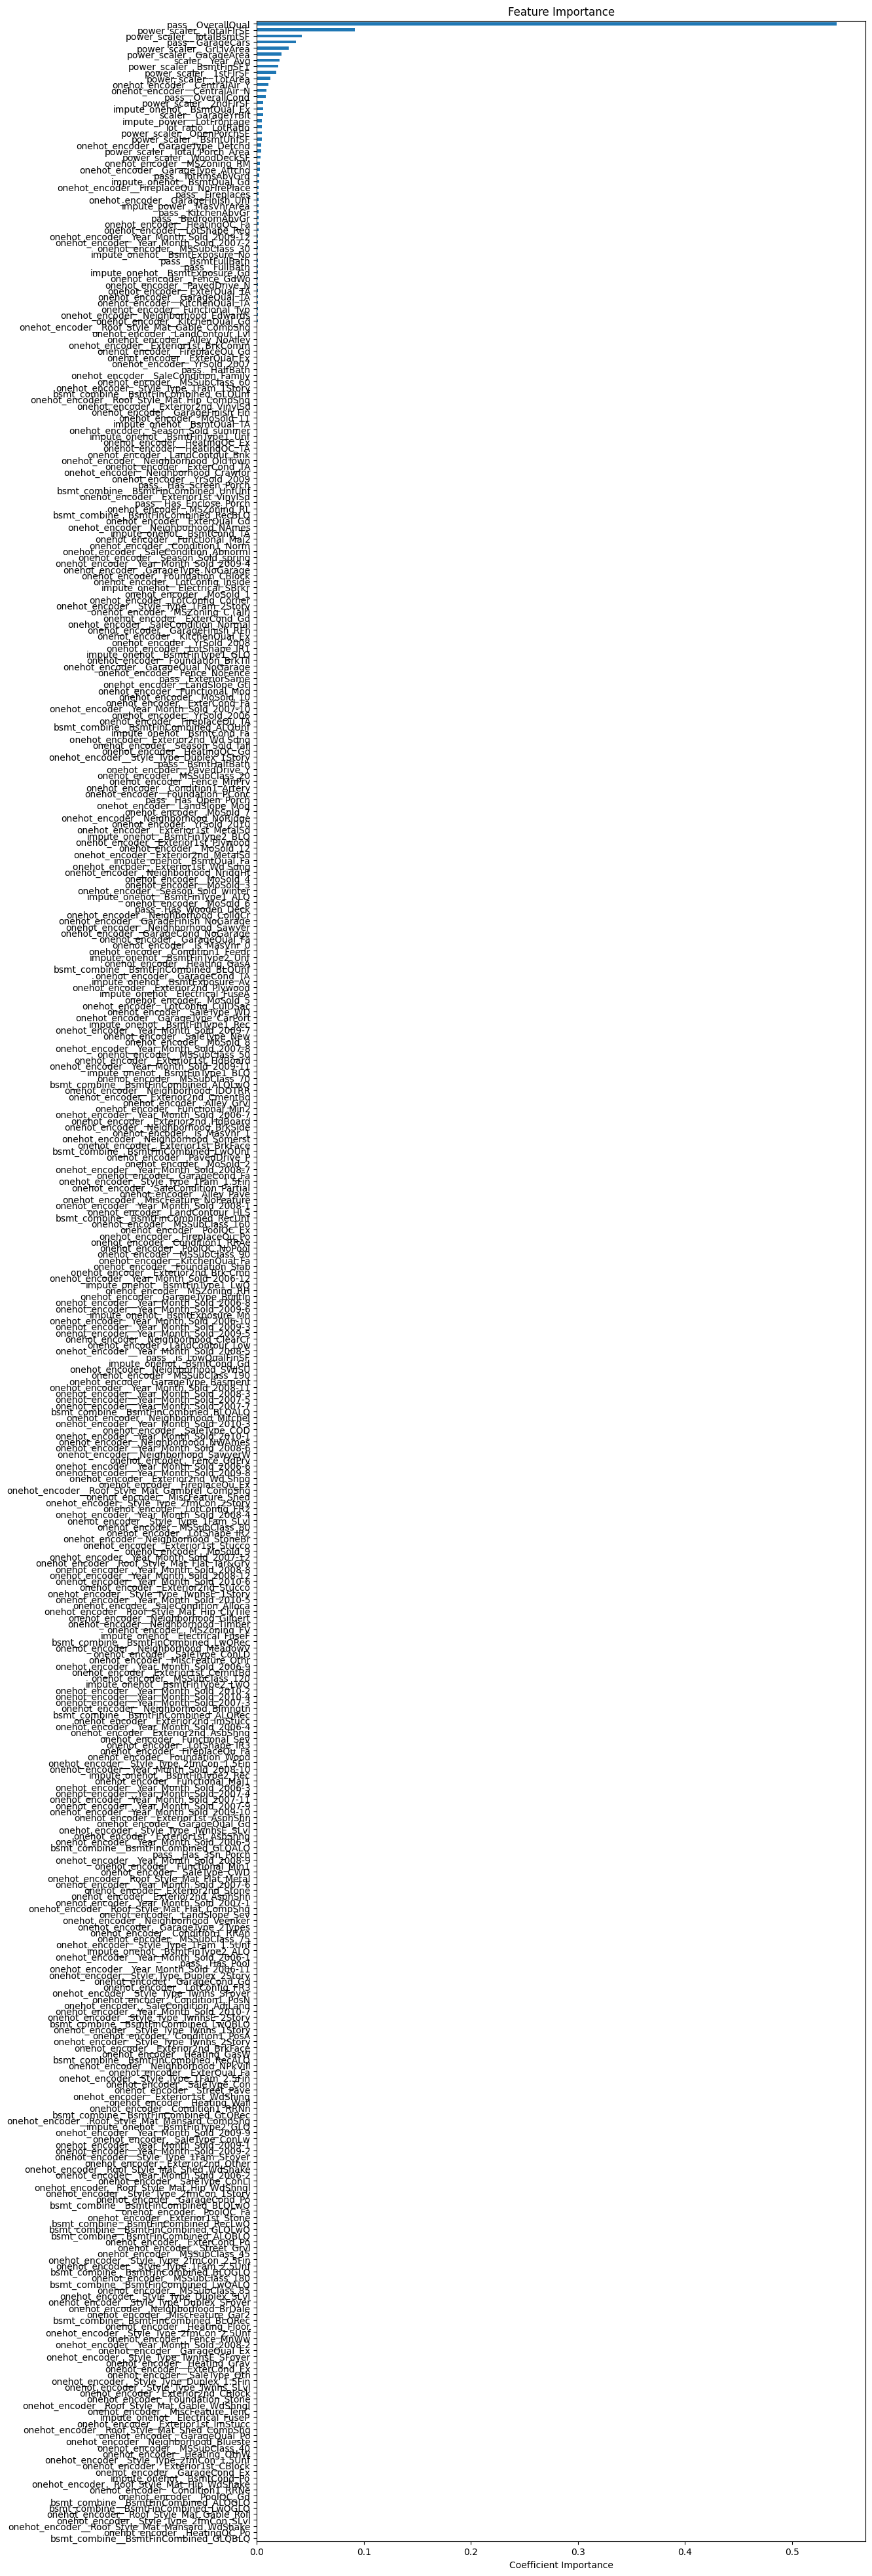

In [13]:
# plotting feature importance
random_forest_coefficients = pd.Series(random_forest_importance, index = random_forest_feature_names)
random_forest_coefficients.sort_values().plot(kind = 'barh', figsize = [12, 50])
plt.xlabel('Coefficient Importance')
plt.title('Feature Importance')